In [63]:
#load Data Set
import pandas as pd
import numpy as np
df=pd.read_csv("diabetes.csv")
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [64]:
df.isnull().sum()
# check for the null values

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [65]:
x=df.drop('Outcome',axis=1).values #independent values
y=df["Outcome"].values

In [66]:
from sklearn.model_selection import train_test_split
xtr,xts,ytr,yts=train_test_split(x,y,test_size=0.3,random_state=1)

In [67]:
#important libraries for the neural network
import torch 
import torch.nn as nn
import torch.nn.functional as F

In [68]:
#first create tensors

xtr=torch.FloatTensor(xtr)
xts=torch.FloatTensor(xts)
ytr=torch.LongTensor(ytr)
yts=torch.LongTensor(yts)


In [69]:
df.shape

(768, 9)

In [70]:
#developing a neural network

class ANN_Model(nn.Module):
    def __init__(self,input_features=8,hidden1=20,hidden2=20,out_features=3):
        super().__init__()
        self.f_connected1=nn.Linear(input_features,hidden1)
        self.f_connected2=nn.Linear(hidden1,hidden2)
        #self.f_connected3=nn.Linear(hidden2,hidden3)
        self.out=nn.Linear(hidden2,out_features)
    def forward(self,x):
        x=F.relu(self.f_connected1(x))
        x=F.relu(self.f_connected2(x))
       # x=F.relu(self.f_connected3(x))
        x=F.relu(self.out(x))
        return x

In [71]:
#instantainate our model

torch.manual_seed(20)
model=ANN_Model()

In [72]:
model.parameters

<bound method Module.parameters of ANN_Model(
  (f_connected1): Linear(in_features=8, out_features=20, bias=True)
  (f_connected2): Linear(in_features=20, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=3, bias=True)
)>

In [73]:
# backward propogation

loss_function=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(),lr=0.01)


In [75]:
# deploying neural Network

epochs=1000
final_losses=[]
for i in range(epochs):
    i+=1
    y_pred=model.forward(xtr)
    loss=loss_function(y_pred,ytr)
    final_losses.append(loss)
    if i%50==1:
        print("Epoch Value: {} and Loss : {}".format(i,loss.item()))
        
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch Value: 1 and Loss : 0.48959219455718994
Epoch Value: 51 and Loss : 0.46589869260787964
Epoch Value: 101 and Loss : 0.42956870794296265
Epoch Value: 151 and Loss : 0.3649482727050781
Epoch Value: 201 and Loss : 0.34858953952789307
Epoch Value: 251 and Loss : 0.35680103302001953
Epoch Value: 301 and Loss : 0.3373132050037384
Epoch Value: 351 and Loss : 0.34057021141052246
Epoch Value: 401 and Loss : 0.3260074555873871
Epoch Value: 451 and Loss : 0.3265674412250519
Epoch Value: 501 and Loss : 0.31733134388923645
Epoch Value: 551 and Loss : 0.32027485966682434
Epoch Value: 601 and Loss : 0.3047494888305664
Epoch Value: 651 and Loss : 0.3244190216064453
Epoch Value: 701 and Loss : 0.29941442608833313
Epoch Value: 751 and Loss : 0.356308251619339
Epoch Value: 801 and Loss : 0.29375186562538147
Epoch Value: 851 and Loss : 0.35212433338165283
Epoch Value: 901 and Loss : 0.2891797125339508
Epoch Value: 951 and Loss : 0.2912607192993164


In [76]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 0, 'Epoch')

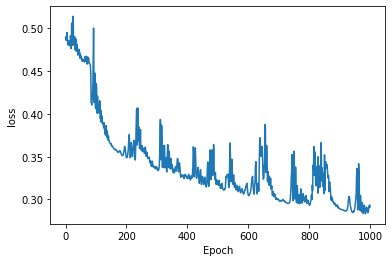

In [77]:
plt.plot(range(epochs),final_losses)
plt.ylabel("loss")
plt.xlabel("Epoch")

In [78]:
predictions=[]
with torch.no_grad():
    for i,data in enumerate(xts):
        y_pred=model(data)
        print(y_pred.argmax().item())
        predictions.append(y_pred.argmax().item())

1
1
1
0
0
0
0
0
0
0
1
0
1
1
1
1
0
0
0
0
1
0
1
1
0
1
0
1
0
0
1
0
0
0
0
1
0
0
0
1
0
0
0
0
0
0
1
1
0
1
0
0
0
0
1
0
1
0
0
1
1
0
0
0
1
0
0
1
1
1
1
1
1
0
1
1
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
1
0
1
0
1
0
0
0
1
0
0
0
1
1
0
0
1
0
0
0
0
0
0
1
0
1
0
1
1
1
0
1
0
0
1
0
1
0
1
0
0
0
0
1
0
0
1
0
0
1
1
1
0
1
0
0
0
1
0
0
1
1
0
0
0
0
1
0
0
0
0
1
0
1
0
0
1
1
0
0
1
0
1
0
0
0
0
1
1
1
0
0
0
0
0
0
0
0
0
0
1
0
1
0
0
1
1
0
0
0
1
1
0
0
0
0
0
0
1
0
0
0
0
0
0
0
1
0
0
1
1
0
0
0
0
1
0


In [79]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(yts,predictions)
cm

array([[122,  24],
       [ 30,  55]], dtype=int64)

In [80]:
from sklearn.metrics import accuracy_score
score=accuracy_score(yts,predictions)
score

0.7662337662337663

In [ ]:
torch.save(model,"diabetes_ANN.pt")